# EDA to Prediction (DieTanic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib style
plt.style.use('seaborn')

#문법변경에 의한 경고를 무시
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=2)

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()
#data.isnull()은 각 컬럼별 null값에 대한 True/False

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The __Age, Cabin and Embarked__ have null values. I will try to __fix__ them.

### How many Survived?

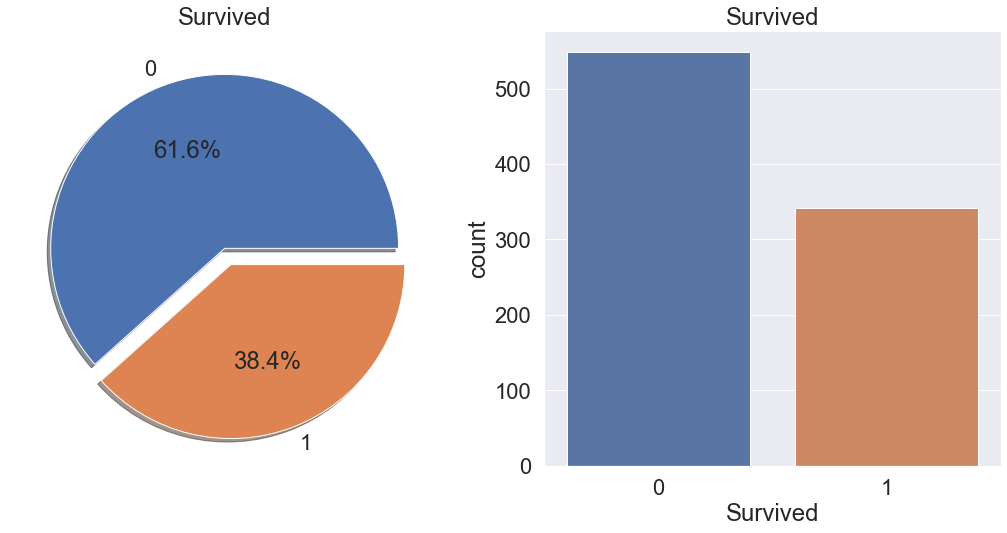

In [5]:
# row개수: 1, col개수: 2
f, ax = plt.subplots(1, 2, figsize = (18, 8))

#value_counts()는 null value를 반환 안 함 (type은 series)
#explode는 숫자를 크게할 수록 간격이 벌어짐
#autopct는 퍼센트 포맷설정
#shadow는 그림자 설정
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 'Survived' 칼럼에 대해 countplot 생성
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- It is evident that not many passengers survived the accident
- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of total training set set survived the crash. We need to __dig down more to get better insights__ from the data and see which categories of the passenger did survived an who didn't

- We will try to check the survival rate by using the different feature of the dataset (Binary Classification에 자주 쓰이는 방법)

- Some of the feature being Sex, Port of Embarcation, Age, etc.

First let us understand the different types of features.

### Types Of Features

#### Categorical features
- A categorical variable is one that has two or more categories and each value in that feature can be categorized by them.

- For example, gender is a categorical variable having two categories (male and female).

- __Now, we cannot sort or give ay ordering to such variables (카테고리는 순서가 없음).__

#### Ordinal features

- An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values.

- If we have feature like height, which values tall, medium, short, then height is a ordinal variable.

예를 들어서,
- A조: 한국, 독일, 스웨덴, 멕시코
- B조: 스페인, 브라질, 덴마크, 잉글랜드
- C조: 일본, 이란, 네덜란드, 프랑스   
- A > B > C 불가 (Categorical Features)

- Label Encoding 후, one hot encoding, frequency encoding, mean encoding 중 하나를 다시 실행


- A: Tall
- B: Medium
- C: Short   
- A > B > C 가능 (Ordinal Features)
- Label Encoding만 해도 무방

#### Continuous features
- A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
- Continous Features in the dataset: Age

__데이터 타입에 따라 시각화 방식을 다르게__

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

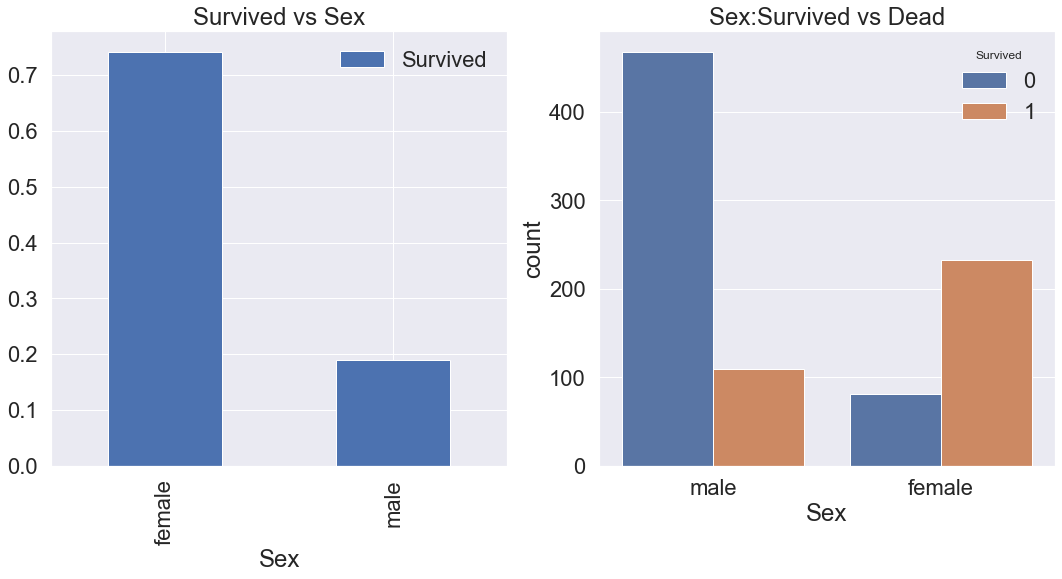

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved.

- The survival rate for a women on the ship is around 75% while that for men in around 18-19%.

- __This looks to be a very important feature for modeling__. But is it the best?? Lets check other features.

In [8]:
# margins True면 All 출력
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


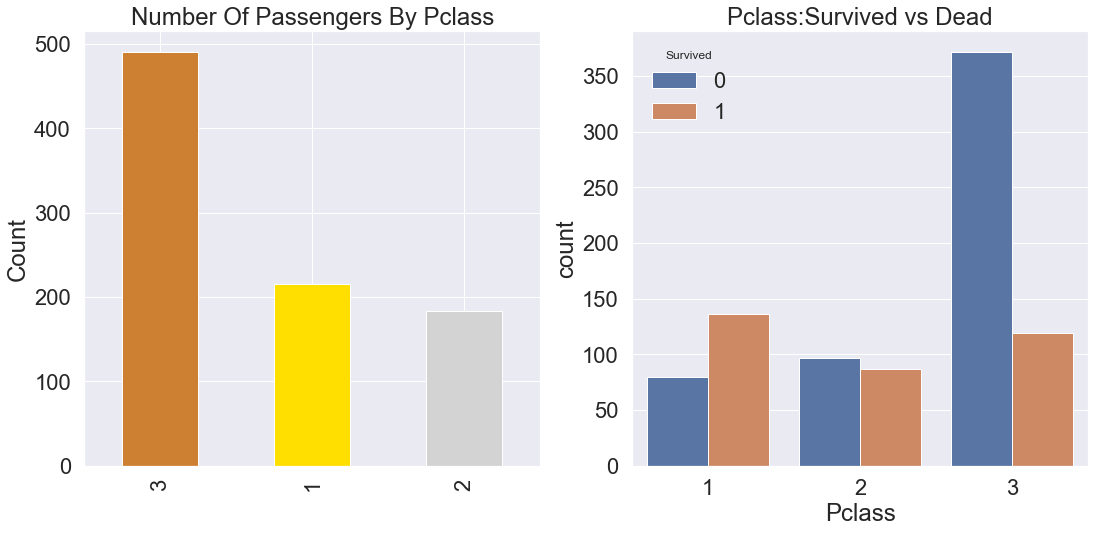

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- People say Money can't buy everything. But we can clearly see that Passengers of Pclass 1 were given a very high priority while rescue.

- Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

- For Pclass 1 % survived is around 63% while Pclass 2 is around 48%.
- Money and status matters. Such a materialistic world.

In [10]:
pd.crosstab([data.Sex, data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

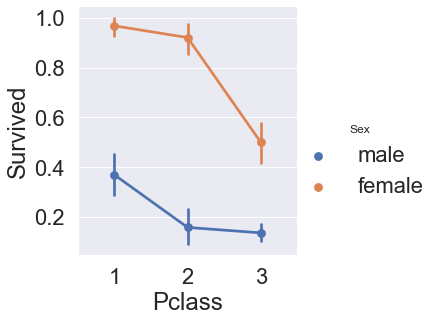

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

- We use __FactorPlot__ in this case, because they make the seperation of categorical values easy.
- Looking at the __CrossTab__ and the __FactorPlot__, we can easily __infer__ that survival for __Women from Pclass1__ is about __95-96%__, as only 3 out of 94 Women from Plcass1 died.
- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

### Age -> Continuous Feature

In [12]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')

Oldest Passenger was of:  80.0 Years


In [13]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

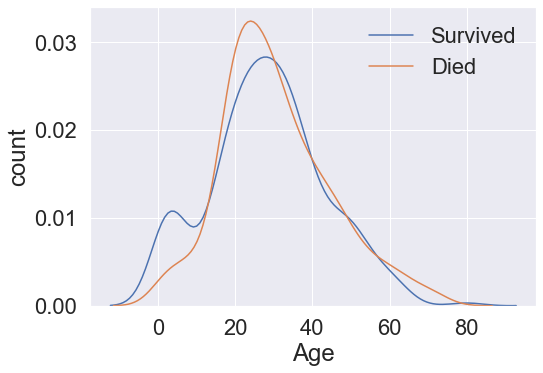

In [14]:
# Continuous Feature에는 히스토그램, Kdeplot이 많이 쓰임.
sns.kdeplot(data.loc[data['Survived']==1, 'Age'], label='Survived')
sns.kdeplot(data.loc[data['Survived']==0, 'Age'], label='Died')
plt.xlabel('Age')
plt.ylabel('count')

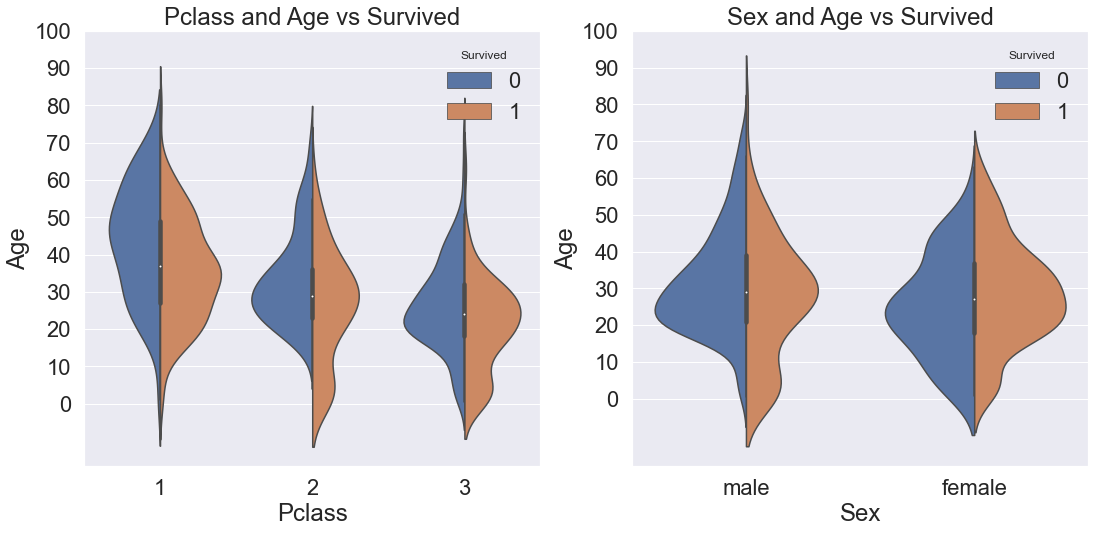

In [15]:
f, ax =plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue = "Survived",data=data, split = True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) 

sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

__Observations:__
1. The numbeer of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass.
2. Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women
3. For males, the survival chances decreases with an increase in age.

Null값 처리에 대한 Insight
- As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.
- But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??
- Bingo!!!, we can check the __Name__ feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean value of Mr and Mrs to the respective groups.

"What's In A Name??" --> Feature

In [16]:
data['Initial']=0
for i in data:
    # 정규 표현식 ([A-Za-z]+)\. '.'이전 str extract
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # lets extract the Salutations

- Okay so here we are using the Regex: __[A-Za-z]+).__. So what it does is, it looks for strings which lie between __A-Z or a-z__ and followed by a __.(dot)__. So we successfully extract the Initials from the Name.

In [17]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean() # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [20]:
## Assigning the NaN Values with the Ceil values of the mean ages
#data.loc[row, column] 형식
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [21]:
data.Age.isnull().any()

False

__캐글에서 가장 먼저 해야할 일 3가지__
1. Null value check
2. EDA
3. Cross-validation

__Feature generation과 Cross-validation은 함께 해야 한다.__   
Feature generation -> Cross validation system -> cv 성능 향상?   
-> Yes -> FeatSetUpdate   
-> No -> Feature generation   
__CV score와 LB(LeaderBoard) score__ 가 linear한 관계의 Cross validation system을 구축해야함

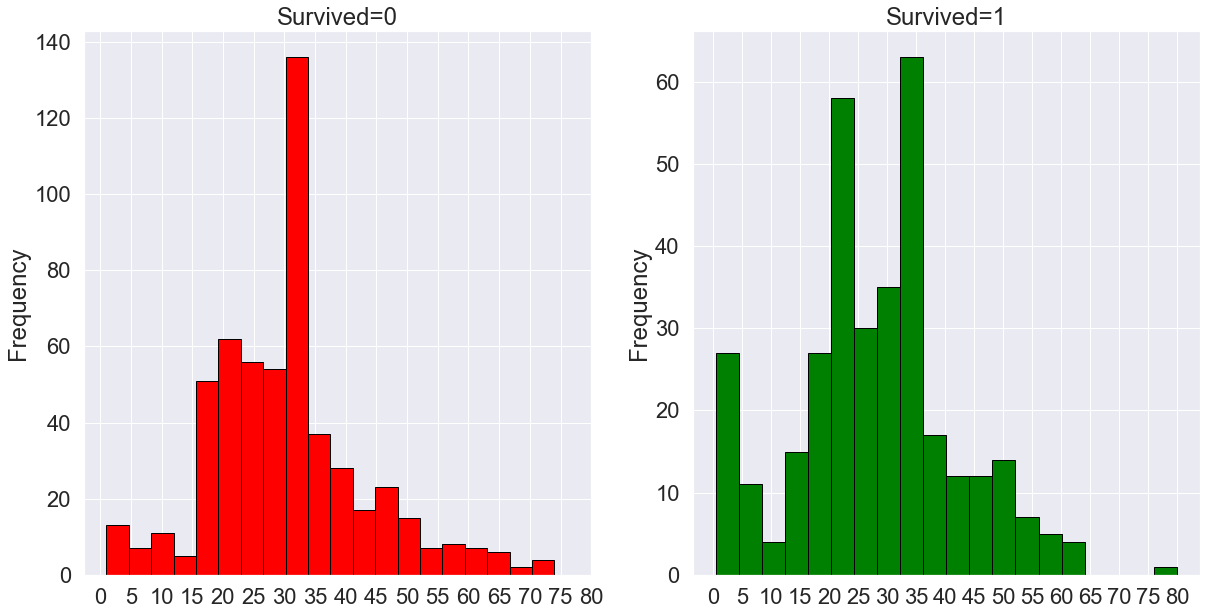

In [22]:
f, ax = plt.subplots(1, 2, figsize = (20,10))

data.loc[data['Survived'] == 0]['Age'].plot.hist(ax = ax[0], bins = 20, edgecolor='black', color = 'red')
ax[0].set_title('Survived=0')
x1= list(range(0,85, 5))
ax[0].set_xticks(x1)
data.loc[data['Survived']==1]['Age'].plot.hist(ax=ax[1],color='green',bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

-Observations:


- The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
- The oldest Passenger was saved(80 years).
- Maximum number of deaths were in the age group of 30-40.

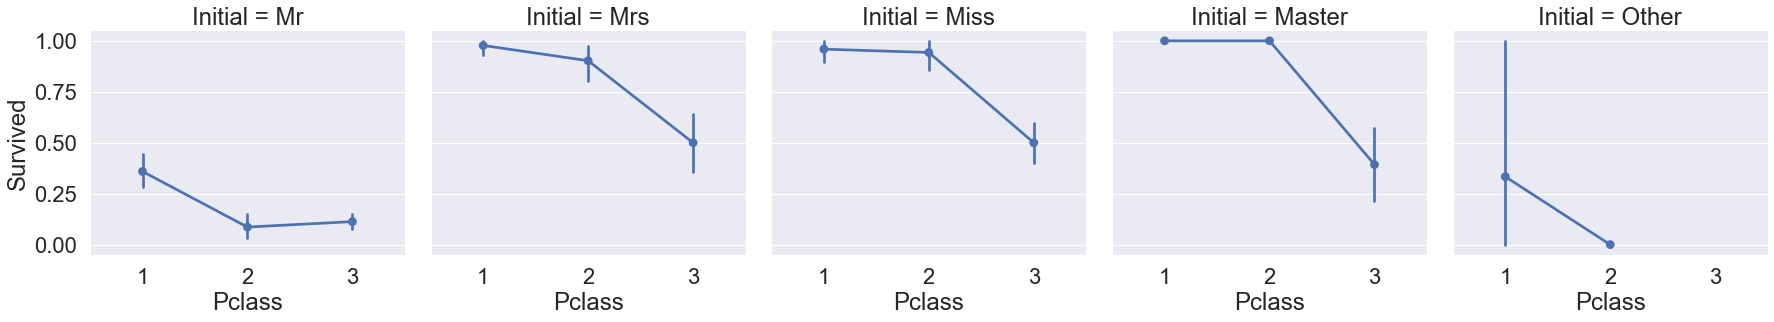

In [23]:
sns.factorplot('Pclass','Survived',col='Initial',data=data) #col 대신 hue 사용하면 같은 그래프내에서 색을 다르게
plt.show()

- The Women and Child first policy thus holds true irrespective of the class.

### Embarked -> Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins = True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port of Embarkation

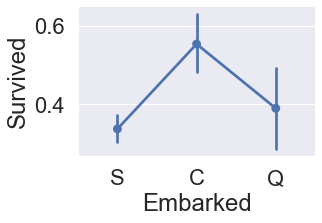

In [25]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- The changes for survival for Port C is highest around 0.55 while it is lowest for S.

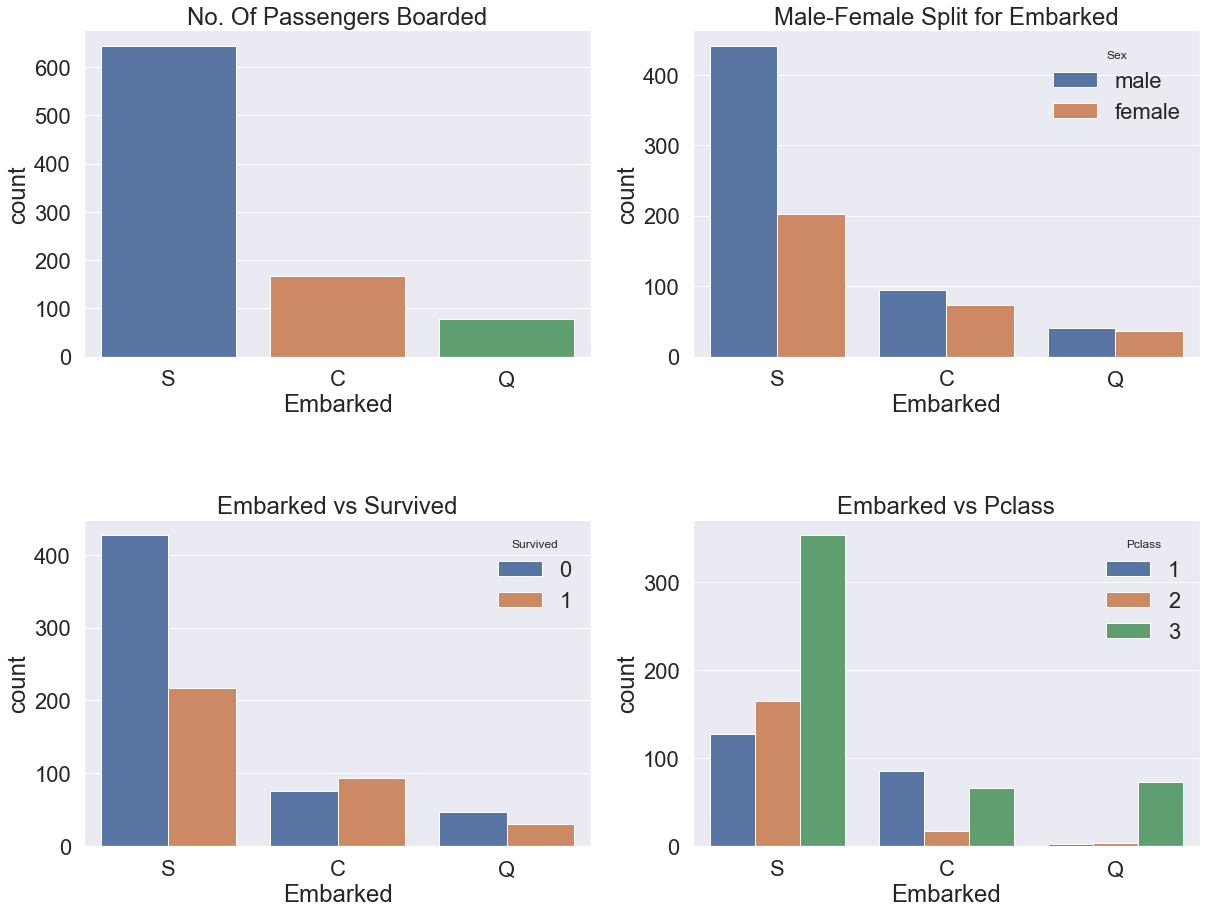

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- Observations:

- Maximum passengers boarded from S. Majority of them being from Pclass3.
- The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
- The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passsengers from Pclass3 around 81% didn't survive.
- Port Q had almost 95% of the passengers were from Pclass3.

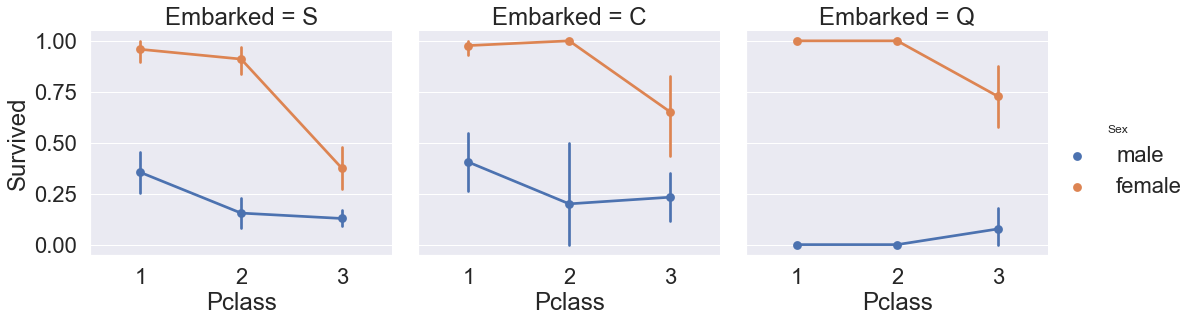

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked',data = data)
plt.show()

- The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.
- Port S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.__(Money Matters)__.
- Port Q looks to be unlucky for Men, as almost all were from Pclass3.

#### Filling Embarked NaN

- As we saw that maximum passengers boarded from Port S, we replace Nan with S.

In [28]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
data['Embarked'].fillna('S',inplace=True)

In [30]:
data['Embarked'].isnull().any()

False

### SibSip -> Discrete Feature

- This feature represents whether a person is alone or with his family members.

In [31]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


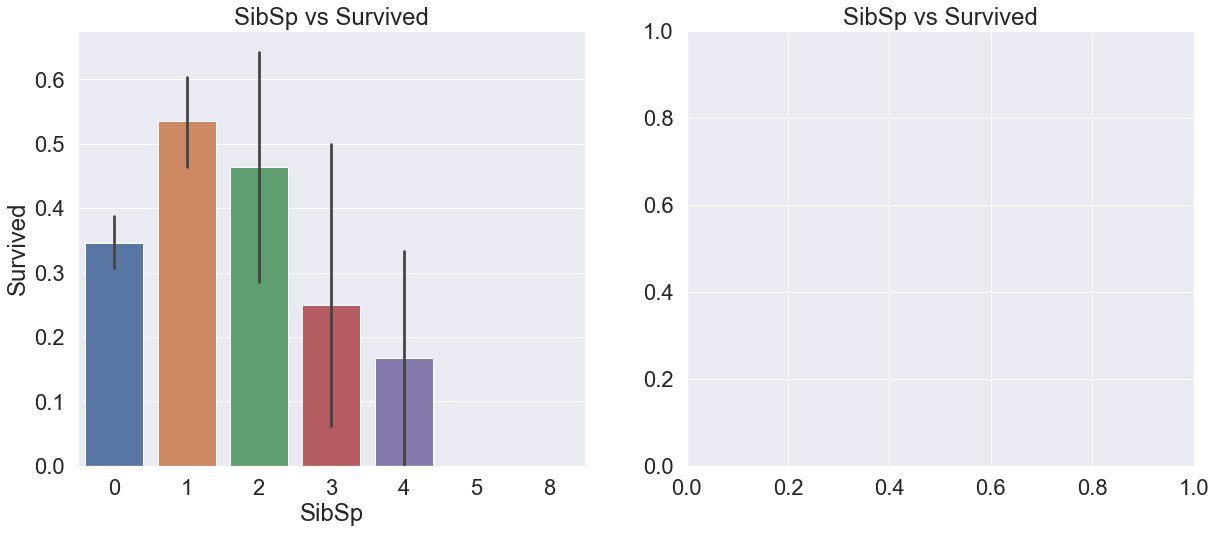

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [33]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Observations:

- The barplot and factorplot show that if a passenger is alone onboard with no siblings, he has 34.5% survival rate.

- The graph roughly decreases if the number of siblings increase.

- This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first.

- Surprisingly the survival for families with 5-8 members is __0%__. The reason may be Pclass??

- The reason is __Pclass__. The crosstab shows that Person with Sibsp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch

In [34]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


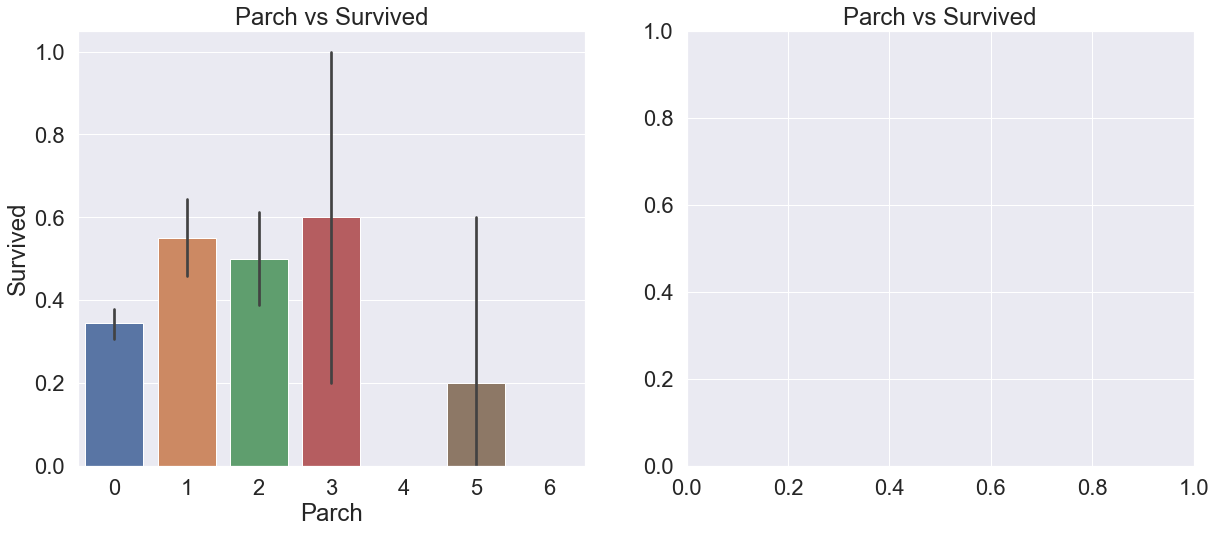

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

- Observations:

- Here too the result are quite simliar.
- Passengers with their parents onboard have greater chance of survival.
- The chances of survival is good for somebody who has 1-3 parents on the ship.
- Being alone also proves to be fatal and the chances for survial decreases when somebody has >4 parents on the ship.

#### Feature Engineering 연습
- 1st 클래스, 여성, S and C
- Sibsp > 3 생존률 낮다

In [36]:
#data['new_cat_pclass_sex']= data['Pclass'].astype(str) + '_' + data['Sex'].astype(str) + '_' + data['Embarked'].astype(str)

In [37]:
#data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

The lowest fare is __0.0__ Wow! a free luxorious ride

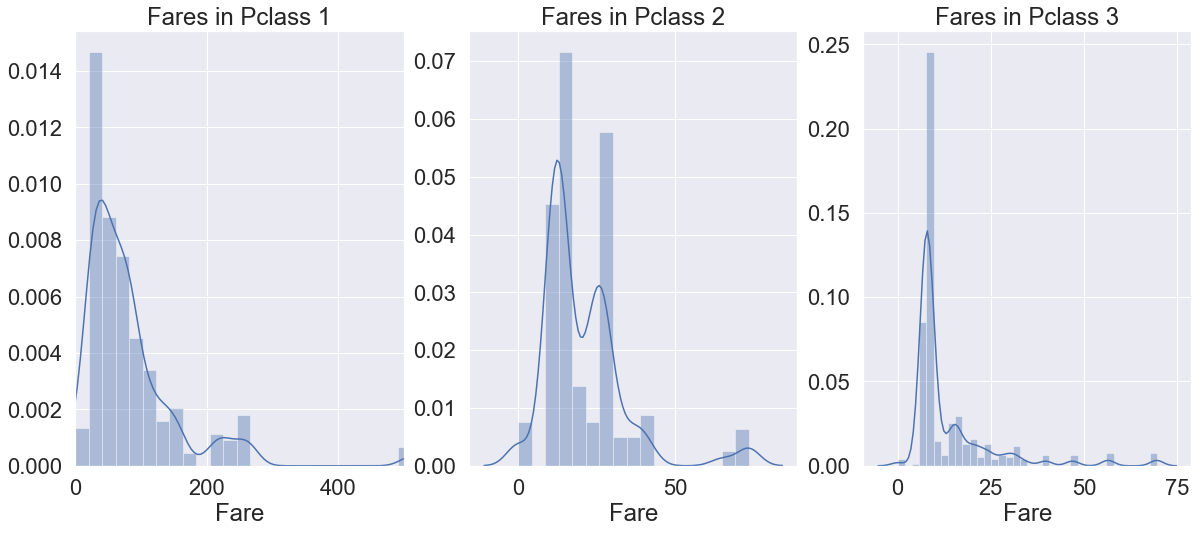

In [38]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
ax[0].set_xlim([0,500])

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
ax[0].set_xlim([0,500])

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
ax[0].set_xlim([0,500])

plt.show()

- There looks to be a large distribution in the fares of Passengers in pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continuous, we can convert into discrete values by using binning.

### Correlation Between The Features

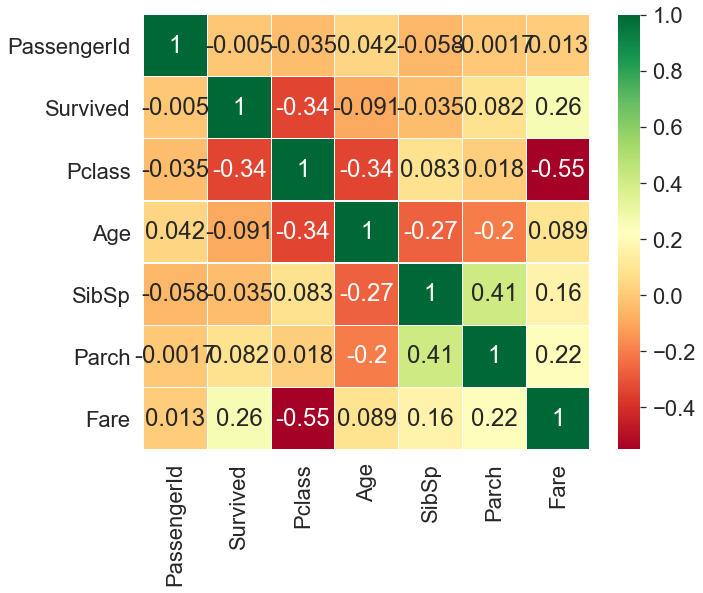

In [39]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpreting The Heatmap
- The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.
- Positive Correlation: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation
- NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.
- Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other.
- This means that both the features are containing highly similar information and there is very little or no variance in information.
- This is known as __MultiColinearity__ as both of them contains almost the same information.
- So do you tnink we should use both of them as one of them is redundant.
- While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.
- Now from the above heatmap, we cna see that the features are not much correlated. The highest corrleation is between __SibSp and Parch i.e 0.41.__ So we can carry on with all features.

__EDA Done__

### Part2: Feature Engineering and Data Cleaning

Now what is feature Engineering?
- Whenever we are given a dataset with features, it is not necessary that all the features will be important.
- There are many redundant features which should be eliminated. Also we can get or add new features by oberserving or extracting information from other features.
- An example would be getting the initial features using the Name Feature.
- Lets see if we can get any new features and eliminate a few. 
- Also we will transform the existing relevant features to suitable form for Predictive Modeling.

### Age_band
__Problem With Age Feature:__ 
- As I have mentioned earlier that __Age is a continous feature__, there is a problem with continous variables in Machine Learning Models.
- If I say to group or arrange Sports Person by Sex, we can easily segregate them by Male and Female.
- Now if I say to group them by ther Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.
- We need to converts these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.
- Okay so the maximum age of a passenger was 80. so lets divide the range from 0-80 into 5 bins. So 80/5 = 16. So size of a bin 16.

In [40]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[(data['Age'] > 64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [41]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') #checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


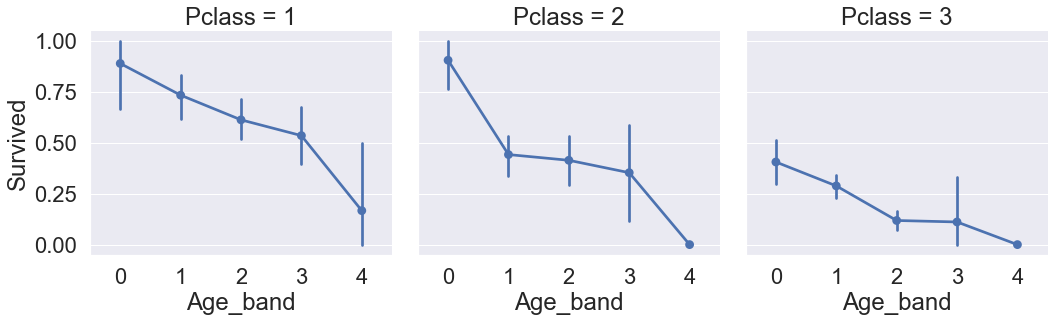

In [42]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

### Family_Size and Alone

- At this point, we can create a new feature called "Family_size" and "Alone" and analyse it.
- This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passnegers.
- Alone will denote whether a passenger is alone or not.

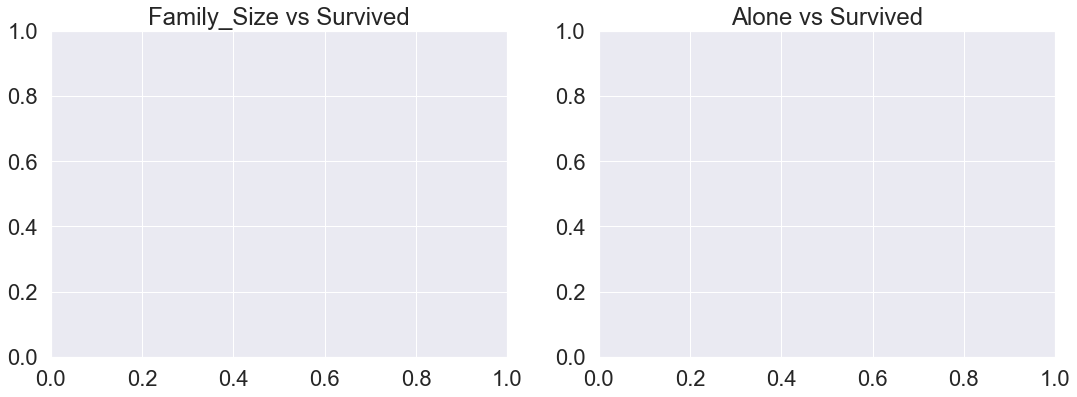

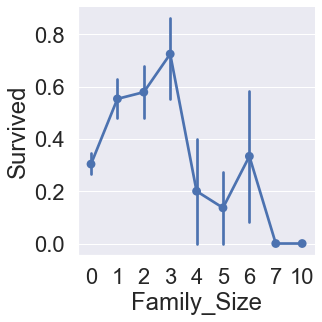

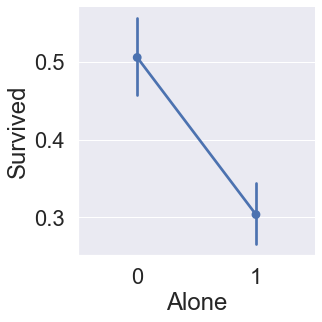

In [43]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

- Family_Size = 0 means that the passenger is alone.
- Clearly if you are alone or family_size=0, then chances for survival is very low. For family size > 4, the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

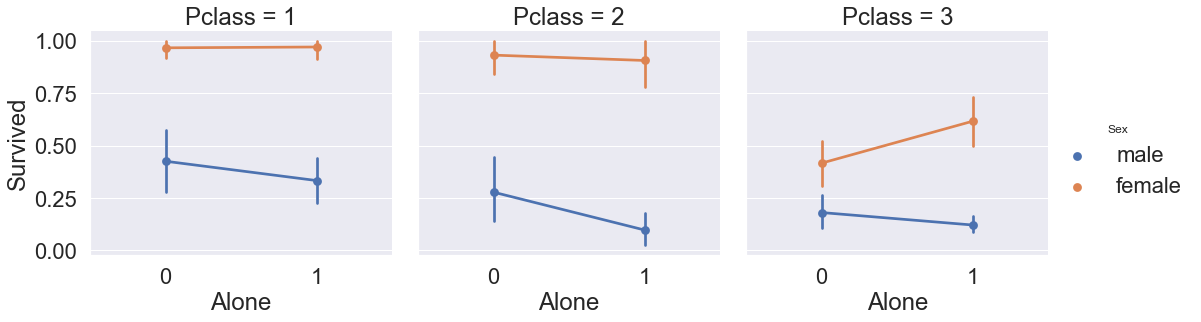

In [44]:
sns.factorplot('Alone', 'Survived', data=data,hue='Sex',col='Pclass')
plt.show()

- It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range

- Since fare is also a continous feature, we need to conver it into ordinal value.
- For this we will use __pandas.qcut__ 
- So what qcut does is it splits or arranges that values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [45]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [46]:
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare_Range, dtype: int64

- qcut은 샘플의 수를 맞춰 줌. Quantile-based function.
- pd.cut은 간격을 동일하게 나눠 줌.

- As dicussed above, we can cleary see that as the __fare_range increases, the chances of survival increases.__
- Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in __Age_Band__.

In [47]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

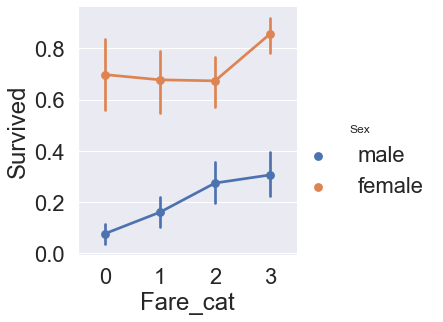

In [48]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

- Clearly, as the fare_cut increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric

- Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [49]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True) # 라벨 인코딩
# factorize로 인코딩하면 라벨 인코딩보다 빠름

#### Dropping UnNeeded Features
- Name--> We don't need name feature as it cannot be converted into any categorical value.

- Age--> We have the Age_band feature, so no need of this.

- Ticket--> It is any random string that cannot be categorised.

- Fare--> We have the Fare_cat feature, so unneeded

- Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

- Fare_Range--> We have the fare_cat feature.

- PassengerId--> Cannot be categorised.

In [50]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

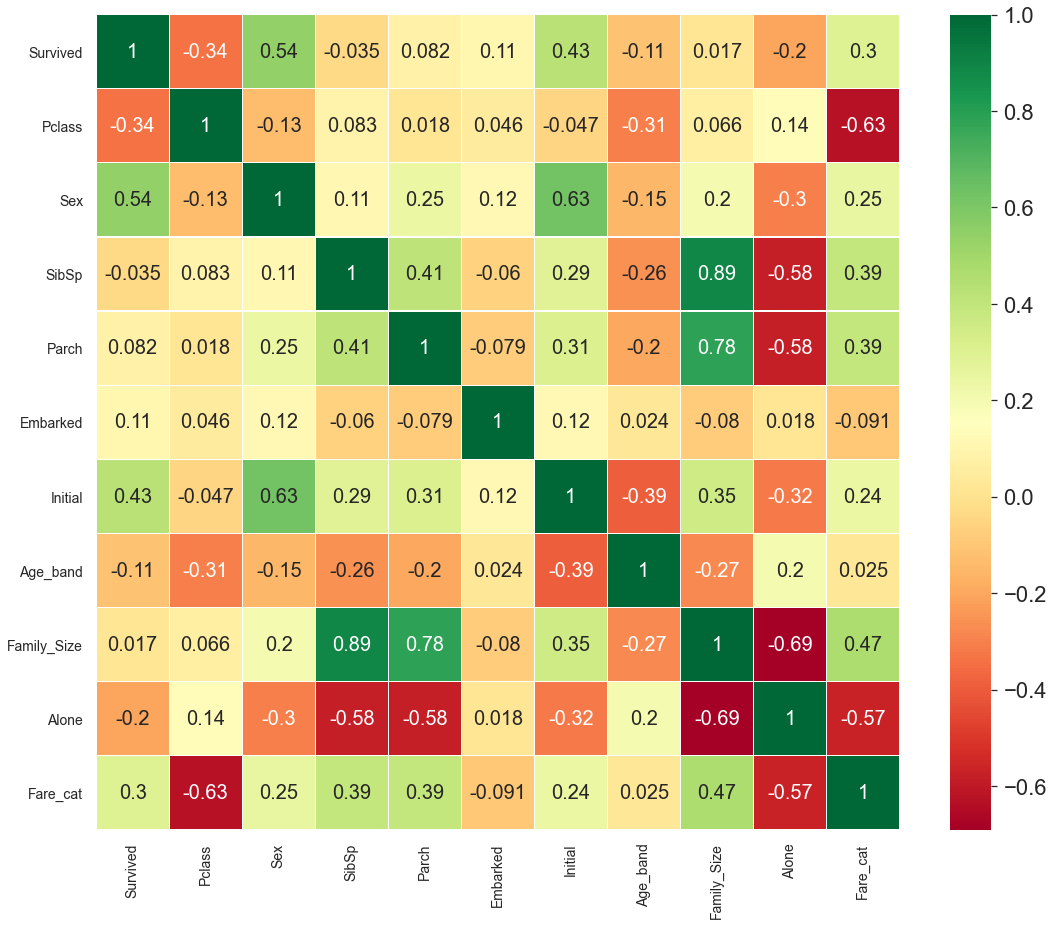

In [51]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Now the above correlation plot, we can see some positively related features.
- Some of them being __SibSp and Family_Size__ and __Pmarch and Family_Size__ and some negative ones like __Alone and Family_Size.__ (2020.08.07)

## Part3: Predictive Modeling

- We have gained some insights from EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whethher the passenger will survive or not using some great Classification algorithms.

- Logistic Regression
- Support Vector Machines(Linear and radial)
- Random Forest
- K-Nearest Neighbours
- Naive Bayes
- Decision Tree

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

- 축구 대표팀 훈련(training)
- 축구 대표팀 평가전 (validation)
- 축구 대표팀 월드컵 (test)

In [53]:
train, test = train_test_split(data, test_size=0.2, random_state = 0, stratify = data['Survived']) # stratify는 target값의 비율대로 train과 test set에 넣어주는 것

In [54]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [55]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1) # parameter 설정을 어떻게? -> manual하게 고쳐보자
model.fit(train_X, train_Y)

SVC(C=1, gamma=0.1)

In [56]:
prediction1 = model.predict(test_X) # 0.5 default값을 threshold로 사용안해도 됨. optimized treshold 찾기
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.8100558659217877


### Linear Support Vector Machine(linear-SVM)

In [57]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7988826815642458


### Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.770949720670391


### Decision Tree

In [59]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.770949720670391


### K-Nearest Neighbours(KNN)

In [60]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.7988826815642458


- Now the accuracy for the KNN model changes as we cange the values for n_neighbours attribute. The default value is __5__. Lets check the accuarcies over various values of n_neighbours. 

In [61]:
a_index = list(range(1,11))

a = pd.Series()

x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)

    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

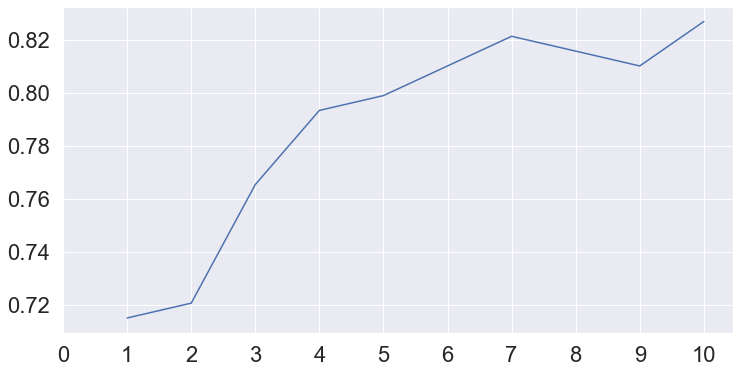

Accuracies for different values of n are: [0.7150838  0.72067039 0.76536313 0.79329609 0.79888268 0.81005587
 0.82122905 0.81564246 0.81005587 0.82681564] with the max value as  0.8268156424581006


In [62]:
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Random Forests

In [63]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.7932960893854749


- The accuracy of a model is not the only factor that determines the robustness of the classifier.
- Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.
- Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??
- The answer is No, because we can't determine which all instances will the classifier will use to train itself.

- As the training and testing data changes, the accuracy will also change.
- It may increase or decrease. This is known as __model variance__.
- To overcome this and get a generalized model, we use __Cross Validation__.

## Cross Validation

- Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances.
- Thus we should train and test our algorithm on each and every instance of the dataset.

- The K-Fold Cross Validation works by first dividing the dataset into k-subsets.
- Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.


In [64]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [65]:
kfold = KFold(n_splits=10, random_state=42)

In [66]:
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm',
'Radial Svm',
'Logistic Regression',
'KNN',
'Decision Tree',
'Naive Bayes',
'Random Forest']

In [67]:
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

In [68]:
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy") # train, test split 없음.
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.806991,0.028514
Naive Bayes,0.801386,0.028999
Random Forest,0.812634,0.034734


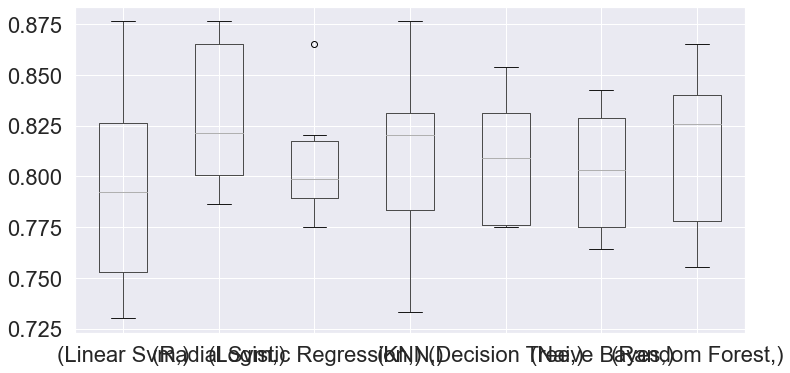

In [69]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

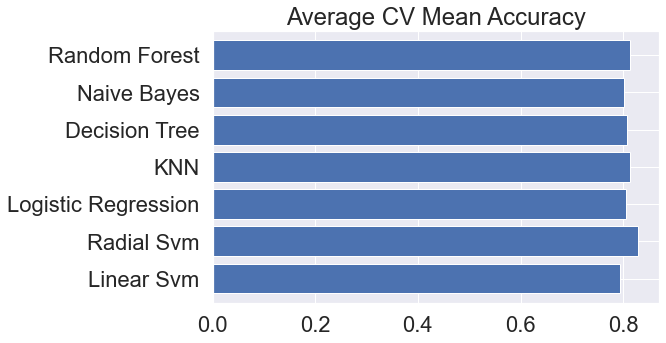

In [70]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- The classification accuracy can be sometimes misleading due to imbalance.
- We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.
- 사망자: 1, 생존자: 99 명인 dataset.
- 모든 사람이 생존했다 -> 99% accuracy
- 사망자를 예측해야하는데, 실제로는 0% (맞게 예측한 사망자 수 / 전체 사망자 수 = 0%)

### Confusion Matrix

In [71]:
sns.set(font_scale=2)

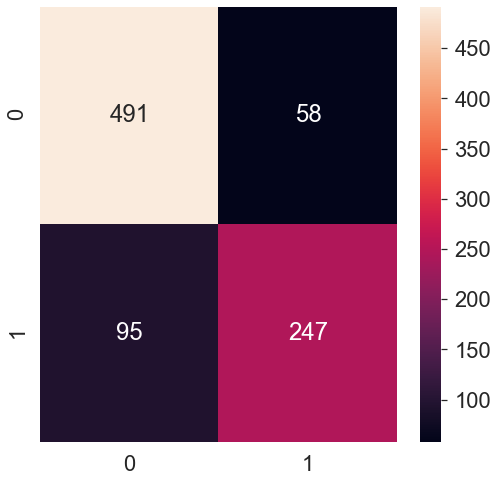

In [72]:
f,ax=plt.subplots(1,1,figsize=(8,8))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax,annot=True,fmt='2.0f')
# y축이 실제 값, x축이 예측 값

(2020.08.12)

### Hyper-Parameters Tuning

- The machine learning models are like a Black-Box.
- There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model.
- This is known as Hyper-Parameter Tuning.

### SVM

In [73]:
from sklearn.model_selection import GridSearchCV

__Hyper-Parameters Tuning 4가지 방법__
- Manual tuning
- Gridsearch CV
- Randomized search
- Baysian optimization

In [74]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose = True)
gd.fit(X,Y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   15.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [75]:
print(gd.best_score_)
print(gd.best_estimator_)

0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [76]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   29.4s finished
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [77]:
best_params = gd.best_estimator_.get_params()

In [78]:
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

- The best score for Rbf-SVM is 82.82% with C=0.4, gamma = 0.3
- For Randomforest score is about 81.9% with n_estimators = 300 

## Ensembling

- Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.
- Lets say we want to buy a phone and ask many people about it based on various pramenters.
- So then we can make a string judgement about a single product after analysing all different parameters.

### Voting Classifier

- It is the simplest way of combining predictions from many different simple machine learning models.
- It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [79]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y) # soft는 probability, hard는 다수결
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.7988826815642458
The cross validated score is 0.8249188514357053


### Bagging

- Bagging is a general emsemble method.
- It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance.
- Unlike Voting classifier, Bagging makes use of similar classifiers.

### Bagging KNN
- Bagging works best with models with __high variance__. An example for this can be Decision Tree or Random Forest. We can use KNN with small value of __n_neighbours__, as small value of n_neighbours.

In [80]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7988826815642458
The cross validated score for bagged KNN is: 0.8160424469413232


### Bagged DecisionTree

In [81]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7877094972067039
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting

- Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.
- Boosting works as follows:
- A model is first trained on the complete dataset. Now the model will get some instances right while some wrong.
- Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it.
- Thus it will try to predict the wrong instance correctly.
- Now this iterative process continous, and new classifiers are added to the model until the limit is reached on the accuarcy.

### AdaBoost(Adaptive Boosting)

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Stochastic Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [84]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


### Confustion Matrix for the Best Model

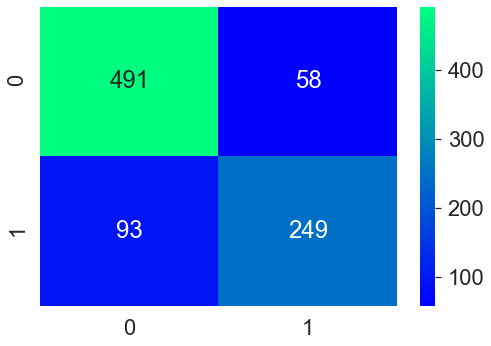

In [85]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

In [86]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

NameError: name 'xg' is not defined

- Feature importance는 상대적, 모델마다 다름.

- We can see the important feature for various classifiers like RandomForests, AdaBoost, etc.

### Observations

- Some of the common important features are Initial, Fare_cat, Pclass, Family_Size.
- The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.
- However, we can see the feature Initial, which is at the top in many classifiers.
- We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.
- Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch and SibSp. (2020.08.13)

- Xgboost python 3.8 호환x